In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from statistics import mean
from sklearn.metrics import f1_score,roc_auc_score,confusion_matrix
import seaborn as sns

pd.options.display.max_seq_items = None

In [4]:
df = pd.read_csv("data/full_data.csv",index_col=0)  
df.head(10)

,Cancer Type Detailed,Mutation Count,Fraction Genome Altered,Diagnosis Age,Sex,Somatic Status,Smoking History,Person Cigarette Smoking History Pack Year Value,TMB Nonsynonymous
0,Lung Adenocarcinoma,3.0,0.1539,56.0,Female,Matched,Former Smoker,36.427867,0.066667
1,Lung Adenocarcinoma,32.0,0.1318,56.0,Female,Matched,Former Smoker,36.427867,1.066667
2,Lung Adenocarcinoma,370.0,0.3385,69.0,Male,Matched,Former Smoker,36.427867,12.466667
3,Lung Adenocarcinoma,72.0,0.0758,69.0,Female,Matched,Former Smoker,36.427867,2.400000
4,Lung Adenocarcinoma,652.0,0.3153,78.0,Male,Matched,Former Smoker,36.427867,21.800000
5,Lung Adenocarcinoma,74.0,0.8972,52.0,Female,Matched,Former Smoker,36.427867,2.466667
6,Lung Adenocarcinoma,64.0,0.4120,57.0,Female,Matched,Former Smoker,36.427867,2.133333
7,Lung Adenocarcinoma,39.0,0.0550,76.0,Male,Matched,Former Smoker,36.427867,1.300000
8,Lung Adenocarcinoma,20.0,0.1158,58.0,Female,Matched,Former Smoker,36.427867,0.666667
9,Lung Adenocarcinoma,80.0,0.4545,75.0,Male,Matched,Former Smoker,36.427867,2.666667


In [5]:
# Split the dataset into train and test sets
X = df.loc[:, df.columns != 'Cancer Type Detailed']
y = df['Cancer Type Detailed']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 11)

In [6]:
# Define the data preparation for the columns
numerical_ix = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X_train.select_dtypes(include=['object']).columns
# Define categorical pipeline
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Define numerical pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define columntransformer 

transformer = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_ix),
        ('cat', categorical_transformer, categorical_ix)
])

In [8]:
# Change your model here
logistic_pipline= imbpipeline([
    ('smote',SMOTENC(categorical_features = [3,4,5],random_state = 11)),
    ('transformer', transformer),
    ('model', LogisticRegression(penalty ='none', solver='saga'))
])

In [9]:
logistic_pipline.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('smote',
                 SMOTENC(categorical_features=[3, 4, 5], random_state=11)),
                ('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Mutation Count', 'Fraction Genome Altered', 'Diagnosis Age',
       'Person Cigarette Smoking History Pack Year Value',
       'TMB Nonsynonymous'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missi

In [10]:
# Accuracy
logistic_pipline.score(X_test, y_test)

0.7694581280788177

In [18]:
# f1 score
preds = logistic_pipline.predict(X_test)
f1_score(y_test, preds, average = "weighted")

0.802816471281084

<AxesSubplot:>

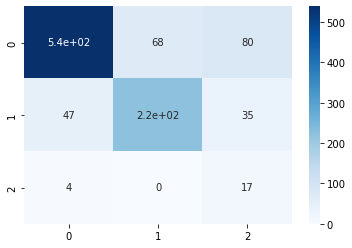

In [19]:
# confusion matrix
cf_matrix = confusion_matrix(y_test,preds)
sns.heatmap(cf_matrix, annot = True, cmap = "Blues")